In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification



# Step 1: Load the Dataset
data = pd.read_csv("bioresponse.csv")
X = data.iloc[:, 1:]  # Input features (molecular descriptors)
y = data.iloc[:, 0]   # Target variable (biological response)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Step 3: Scale the Dataset
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Step 3: Train the Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = lr_model.predict(X_test)

# Step 5: Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7611940298507462


Gradient Descent (GD):


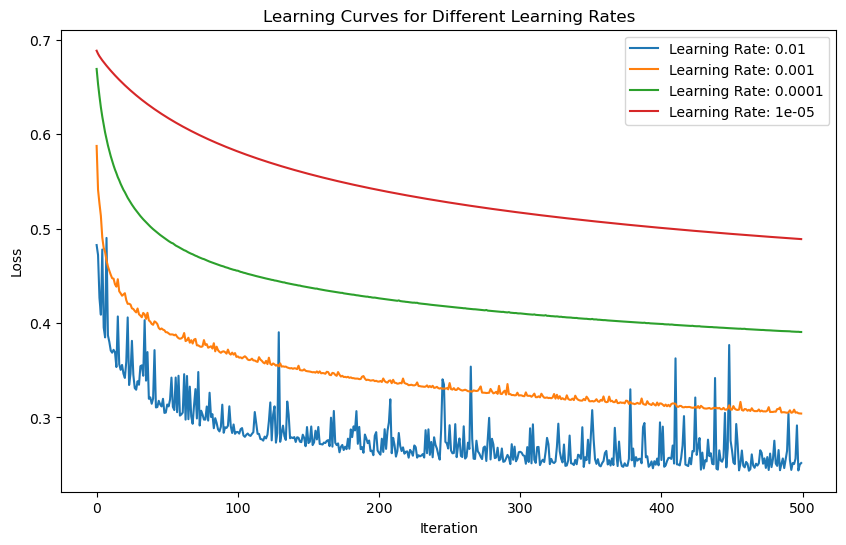

Learning Rate: 0.01, Accuracy: 0.7484008528784648
Learning Rate: 0.001, Accuracy: 0.7547974413646056
Learning Rate: 0.0001, Accuracy: 0.7686567164179104
Learning Rate: 1e-05, Accuracy: 0.7526652452025586
Stochastic Gradient Descent (SGD):


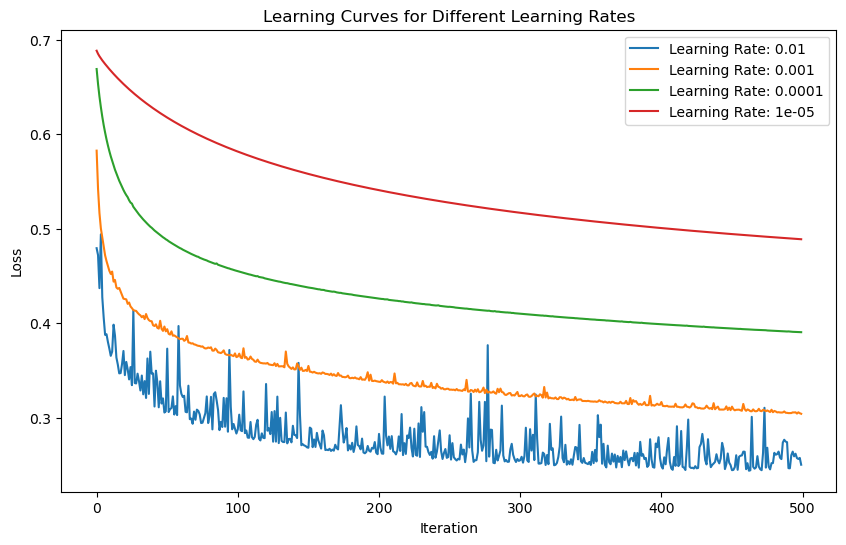

Learning Rate: 0.01, Accuracy: 0.7398720682302772
Learning Rate: 0.001, Accuracy: 0.753731343283582
Learning Rate: 0.0001, Accuracy: 0.7665245202558635
Learning Rate: 1e-05, Accuracy: 0.7526652452025586
Adam Optimizer:


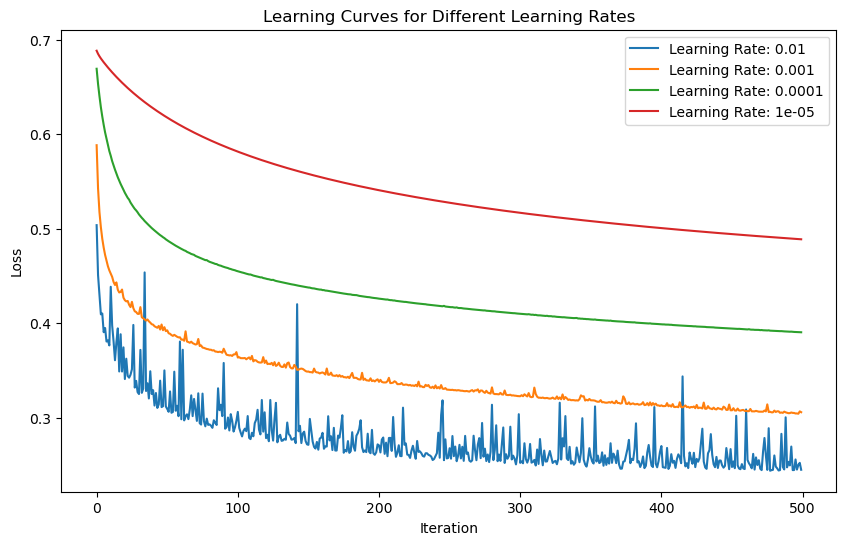

Learning Rate: 0.01, Accuracy: 0.7611940298507462
Learning Rate: 0.001, Accuracy: 0.7611940298507462
Learning Rate: 0.0001, Accuracy: 0.7686567164179104
Learning Rate: 1e-05, Accuracy: 0.7526652452025586


In [73]:
def plot_learning_curve(loss_curves, learning_rates):
    plt.figure(figsize=(10, 6))
    for i, loss_curve in enumerate(loss_curves):
        plt.plot(loss_curve, label=f"Learning Rate: {learning_rates[i]}")

    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Learning Curves for Different Learning Rates")
    plt.legend()
    plt.show()


def train_and_evaluate_model(X_train, X_test, y_train, y_test, learning_rates, optimizer):
    loss_curves = []
    accuracies = []

    for learning_rate in learning_rates:
        if optimizer == "GD":
            model = SGDClassifier(learning_rate="constant", eta0=learning_rate, max_iter=500, loss='log_loss')
        elif optimizer == "SGD":
            model = SGDClassifier(learning_rate="constant", eta0=learning_rate, max_iter=500, loss='log_loss')
        elif optimizer == "Adam":
            model = SGDClassifier(learning_rate="constant", eta0=learning_rate, max_iter=500, loss='log_loss')

        loss_curve = []
        for _ in range(model.max_iter):
            model.partial_fit(X_train, y_train, classes=np.unique(y_train))
            y_pred_proba = model.predict_proba(X_train)
            loss = log_loss(y_train, y_pred_proba)
            loss_curve.append(loss)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        loss_curves.append(loss_curve)

    plot_learning_curve(loss_curves, learning_rates)

    for i, learning_rate in enumerate(learning_rates):
        print(f"Learning Rate: {learning_rate}, Accuracy: {accuracies[i]}")


# # Generate a synthetic dataset for demonstration
# X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the learning rates
learning_rates = [0.01, 0.001, 0.0001, 0.00001]

# Train and evaluate models with different learning rates for GD
print("Gradient Descent (GD):")
train_and_evaluate_model(X_train, X_test, y_train, y_test, learning_rates, optimizer="GD")

# Train and evaluate models with different learning rates for SGD
print("Stochastic Gradient Descent (SGD):")
train_and_evaluate_model(X_train, X_test, y_train, y_test, learning_rates, optimizer="SGD")

# Train and evaluate models with different learning rates for Adam
print("Adam Optimizer:")
train_and_evaluate_model(X_train, X_test, y_train, y_test, learning_rates, optimizer="Adam")